In [1]:
%load_ext autoreload
%autoreload 2

from __future__ import division, print_function
%matplotlib inline

import matplotlib.pyplot as plt

import numpy as np
np.set_printoptions(precision=4)#, suppress=True)
%cd -q ../scripts/

## figure 2: the diagonal model

I use the tikmagic described in http://blog.invibe.net/posts/2015-01-20-using-tikzmagic.html

In [2]:
import tikzmagic

## version with all four variants

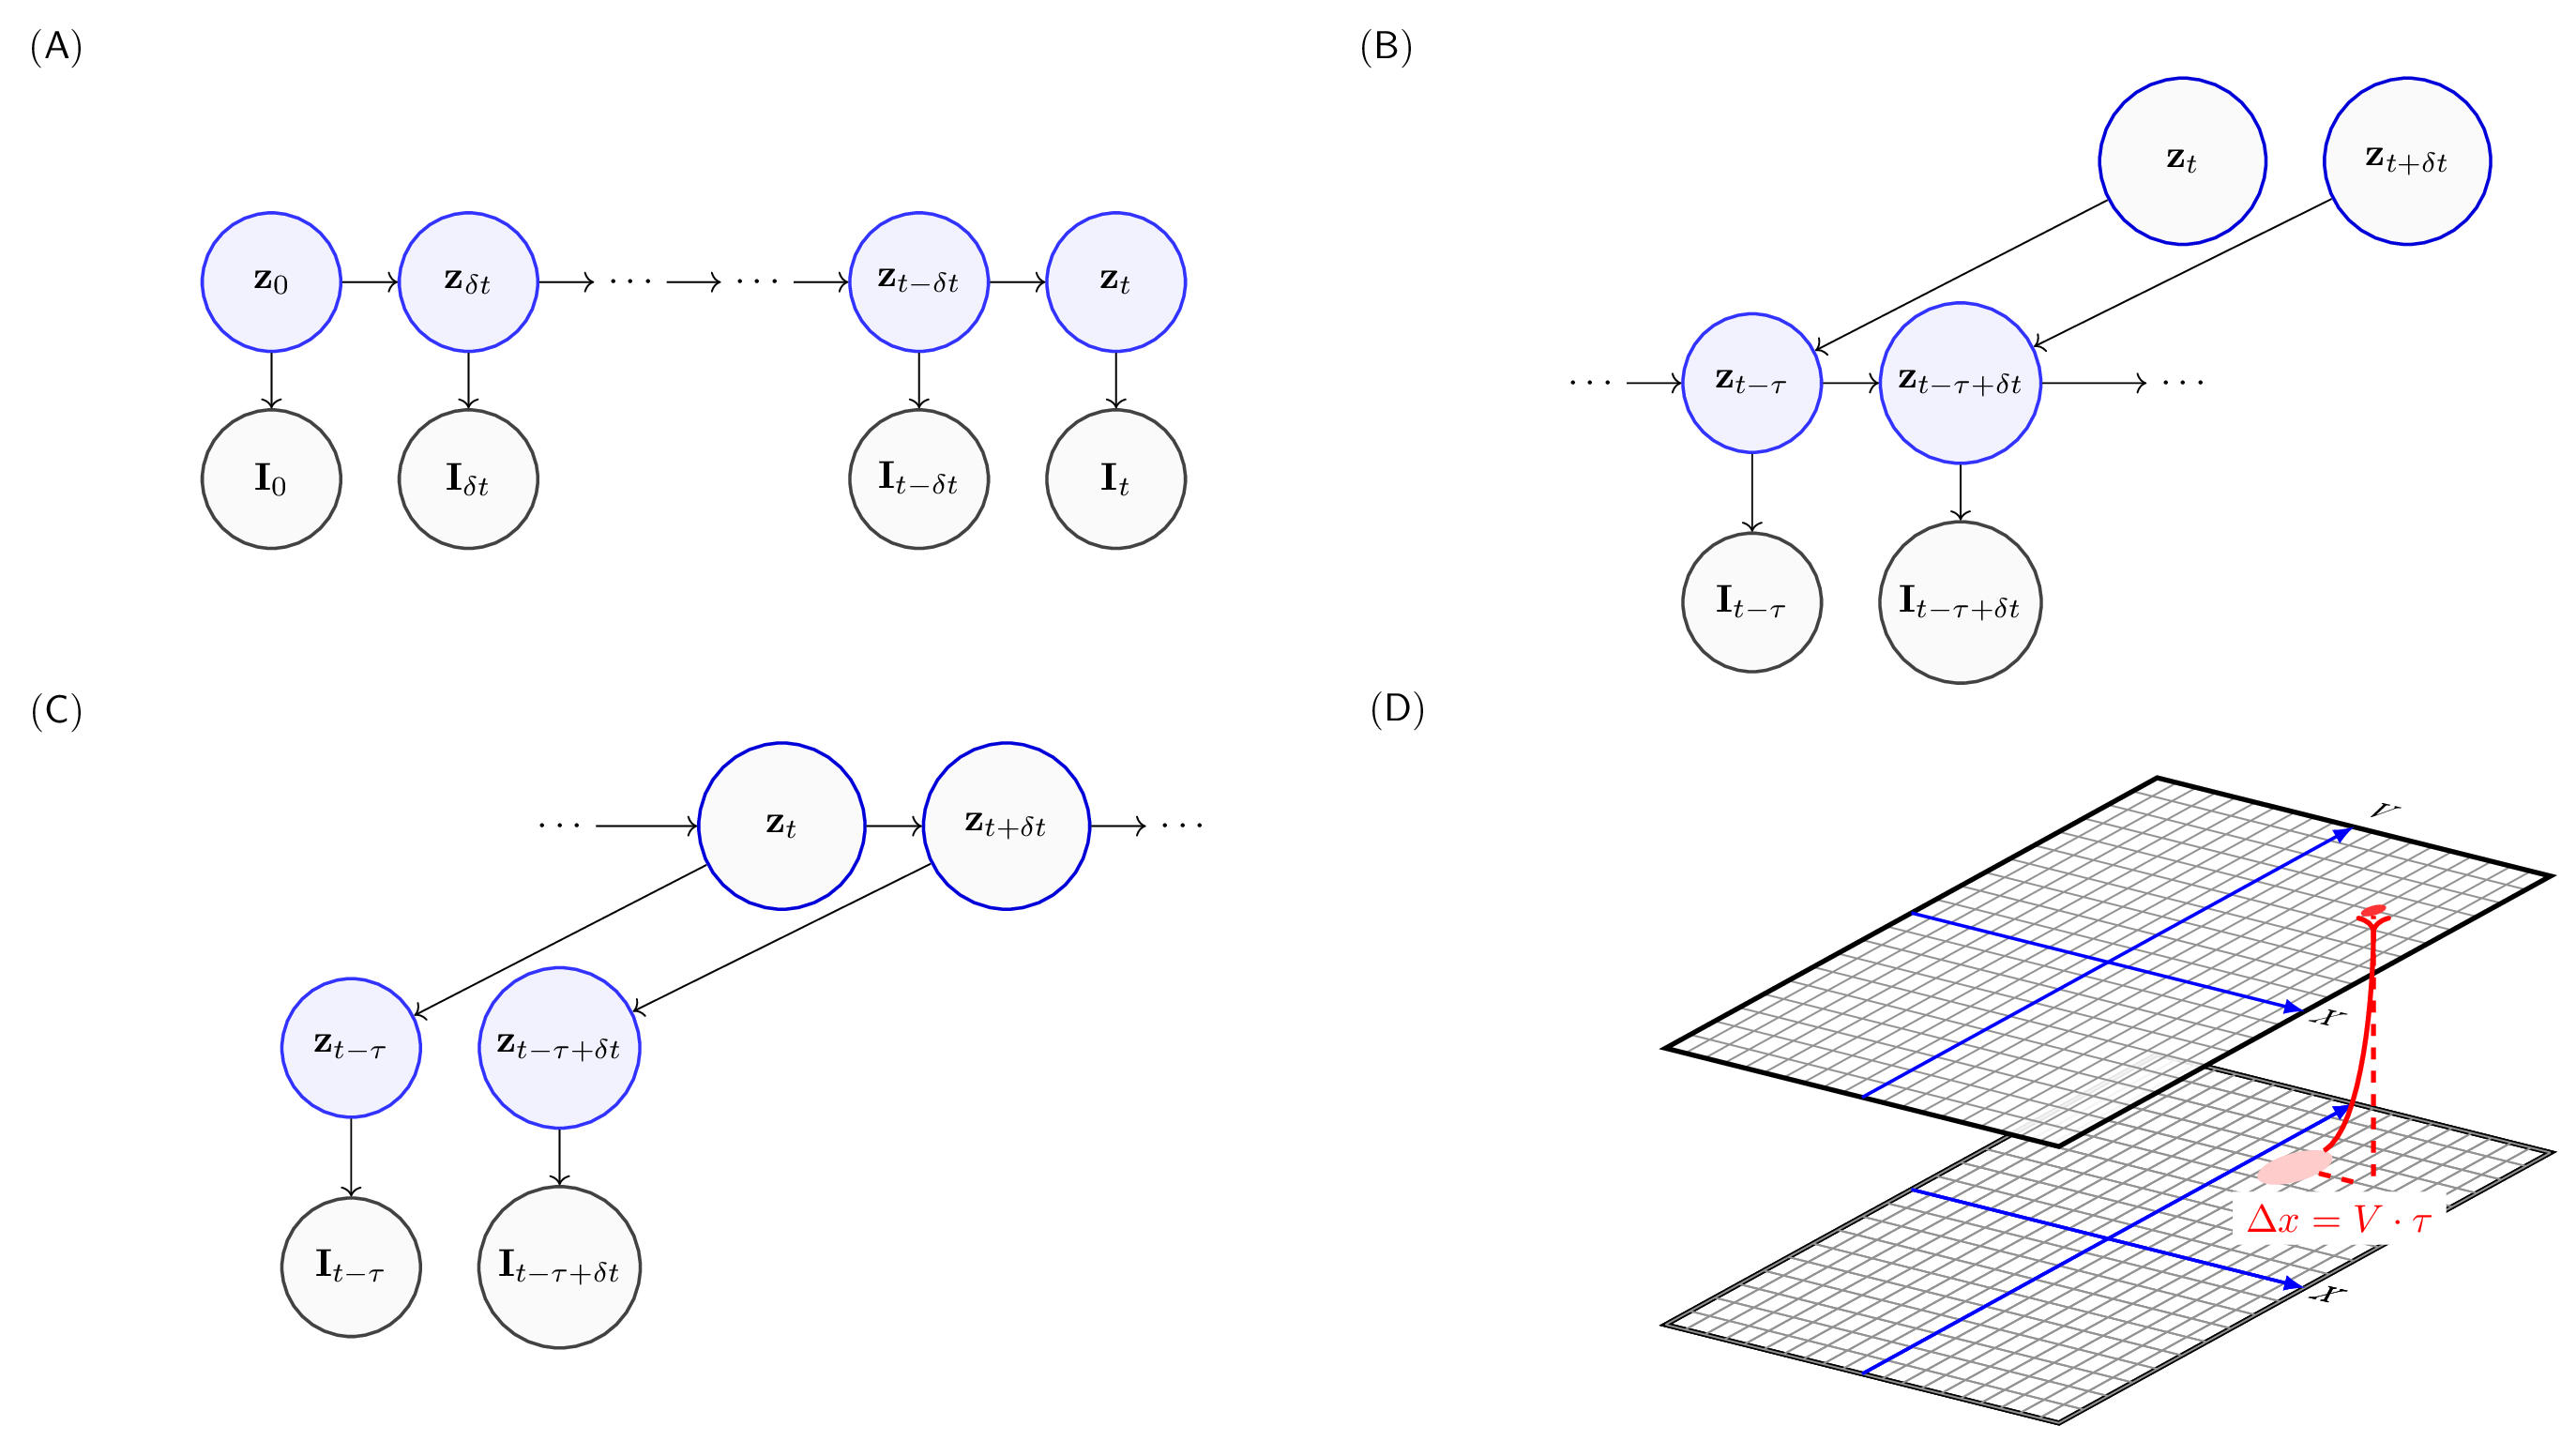

In [3]:
%%tikz -l arrows.meta 

% The state vector is represented by a blue circle.
% "minimum size" makes sure all circles have the same size
% independently of their contents.
\tikzstyle{state}=[circle, thick, minimum size=1.25 cm, draw=blue!80, fill=blue!5]

% The measurement vector is represented by an orange circle.
\tikzstyle{measurement}=[circle, thick,  minimum size=1.25 cm, draw=black!80, fill=gray!5]

% The input, state transition, and measurement matrices
% are represented by gray squares.
% They have a smaller minimal size for aesthetic reasons.
\tikzstyle{matrx}=[rectangle,thick, minimum size=1cm , draw=gray!80, fill=gray!20]

\tikzstyle{present}=[circle, thick, minimum size=1.5cm, draw=blue!85!black, fill=gray!5]

\begin{scope}[xscale=1, xshift=0cm]
\draw (-6cm, 3cm) node {$\mathsf{(A)}$};
  % The various elements are conveniently placed using a matrix:
  \matrix[row sep=0.5cm, column sep=0.5cm] {
    
        % Third line: State & state transition matrix
        \node (z_0) [state] {$\mathbf{z}_{0}$}; &

        \node (z_1)   [state] {$\mathbf{z}_{\delta t}$};     &
         \node (A)         {$\cdots$};           &
         \node (B)         {$\cdots$};           &
 
        \node (z_t)   [state] {$\mathbf{z}_{t-\delta t }$};     &
        \node (z_t+1) [state] {$\mathbf{z}_{t }$}; &
        % Fourth line: Measurement noise & measurement matrix
        \\
        % Fifth line: Measurement
        \node (I_0) [measurement] {$\mathbf{I}_{0 }$}; &      
        \node (I_1) [measurement] {$\mathbf{I}_{\delta t }$}; &      
        &
        &
        \node (I_t)   [measurement] {$\mathbf{I}_{t-\delta t }$};     &        
        \node (I_t+1) [measurement] {$\mathbf{I}_{t }$}; &
        \\
    };
    
    % The diagram elements are now connected through arrows:
    \path[->]
        (z_0)   edge (I_0)
        (z_1)   edge (I_1)
        (z_t)   edge (I_t)
        (z_t+1) edge (I_t+1)
        (z_1)   edge (A)
        (A)   edge (B)
        (B)   edge (z_t)
        (z_0)   edge (z_1)
        (z_t)   edge (z_t+1)       
        ;
       
\end{scope}
\begin{scope}[xscale=1, xshift=12cm]
\draw (-6cm, 3cm) node {$\mathsf{(B)}$};
  
  % The various elements are conveniently placed using a matrix:
  \matrix[row sep=0.5cm,column sep=0.5cm] {
        % Top line: present estimate
        &
        &
        &
        \node (t)   [present] {$\mathbf{z}_{t}$};     &
        \node (t+dt) [present] {$\mathbf{z}_{t + \delta t}$};        &
        \\
        % Middle line: State & state transition matrix
         \node (A)         {$\cdots$};           &

        \node (t-tau)   [state] {$\mathbf{z}_{t-\tau}$};     &
        \node (t-tau+dt)   [state] {$\mathbf{z}_{t - \tau+\delta t}$};     &
        \node (B)         {$\cdots$};           &
                &
        \\
        % Bottom line: Measurement noise & measurement matrix
        &
        \node (I_t-tau) [measurement] {$\mathbf{I}_{t - \tau}$}; &      
        \node (I_t-tau+dt)   [measurement] {$\mathbf{I}_{t - \tau + \delta t}$};     &        
        &
                &
        \\
    };

    % The diagram elements are now connected through arrows:
    \path[->]
        (A)   edge (t-tau) 
        (t-tau)   edge (t-tau+dt)
        (t-tau+dt) edge (B)
      
        (t)   edge (t-tau)
        (t+dt)   edge (t-tau+dt)

        (t-tau)   edge (I_t-tau)
        (t-tau+dt) edge (I_t-tau+dt)
	;
    
\end{scope}
\begin{scope}[xscale=1, yshift=-6cm, xshift=0cm]
\draw (-6cm, 3cm) node {$\mathsf{(C)}$};

  % The various elements are conveniently placed using a matrix:
  \matrix[row sep=0.5cm,column sep=0.5cm] {
        % Top line: present estimate
        &
         &
         \node (A)         {$\cdots$};           &
        \node (t)   [present] {$\mathbf{z}_{t}$};     &
        \node (t+dt) [present] {$\mathbf{z}_{t + \delta t}$};        &
        \node (B)         {$\cdots$};           \\
        % Middle line: State & state transition matrix
        &
        \node (t-tau)   [state] {$\mathbf{z}_{t-\tau}$};     &
        \node (t-tau+dt)   [state] {$\mathbf{z}_{t - \tau+\delta t}$};     &
        &
                &
        \\
        % Bottom line: Measurement noise & measurement matrix
        &
        \node (I_t-tau) [measurement] {$\mathbf{I}_{t - \tau}$}; &      
        \node (I_t-tau+dt)   [measurement] {$\mathbf{I}_{t - \tau + \delta t}$};     &        
        &
                &
        \\
    };

    
    % The diagram elements are now connected through arrows:
    \path[->]
        (A)   edge (t) 
        (t)   edge (t+dt)
        (t+dt) edge (B)
      
        (t)   edge (t-tau)
        (t+dt)   edge (t-tau+dt)

        (t-tau)   edge (I_t-tau)
        (t-tau+dt) edge (I_t-tau+dt)

	;
   
    
\end{scope}
\begin{scope}[scale=.71, xshift=12cm, yshift=-12cm]
\draw (-3.4cm, 7.8cm) node {$\mathsf{(D)}$};
        
    \tikzstyle{every pin edge}=[<-,shorten <=1pt]
    \tikzstyle{neuron}=[circle,fill=black!25,inner sep=0pt]
    \tikzstyle{input neuron1}=[neuron,minimum size=12pt, fill=red!20];
     \tikzstyle{input neuron2}=[neuron,minimum size=12pt, fill=red!20];
    \tikzstyle{output neuron1}=[neuron,minimum size=4pt, fill=red!80];


    \begin{scope}[every node/.append style={
            yslant=-0.25,xslant=1.25},yslant=-0.25,xslant=1.25
                  ]
        %marking border
        \draw[black,very thick] (0,0) rectangle (5,5);
        \draw[step=2.5mm, black!50] (0,0) grid (5,5);
        \draw[-latex,thick,blue](0,2.5) to (5,2.5);
        \draw[-latex,thick,blue](2.5,0) to (2.5,5);
        \draw (5,2.5) node[right]{x};
%        \draw (2.5,5) node[above]{v};

    \node[input neuron1] (in) at (3, 4) {};
    \node (proj) at (4, 4) {};  
    
    %\node[input neuron2] (in) at (0, 0) {};
    %\node (proj) at (1, 0) {};  
    %\node[output neuron2] (out) at (4, 0) {};
  
    \end{scope} 
    
    
     \begin{scope}[every node/.append style={
            yslant=-0.25,xslant=1.25},yslant=-0.25,xslant=1.25
                  ]
        %marking border
        \draw[black,very thick] (0,0) rectangle (5,5);
        \draw[step=2.5mm, black!50] (0,0) grid (5,5);
        \draw[-latex,thick,blue](0,2.5) to (5,2.5);
        \draw[-latex,thick,blue](2.5,0) to (2.5,5);
        \draw (5,2.5) node[right]{x};
%        \draw (2.5,5) node[above]{v};

    \node[input neuron1] (in) at (3, 4) {};
    \node (proj) at (4, 4) {};  
    
    %\node[input neuron2] (in) at (1, 2) {};
    %\node (proj) at (2, 3) {};  
  
    \end{scope} 

    % area V1 input
    \begin{scope}[yshift=100,every node/.append style={
            yslant=-0.25,xslant=1.25},yslant=-0.25,xslant=1.25
            ] 
        % opacity to prevent graphical interference
        \fill[white,fill opacity=.9] (0,0) rectangle (5,5);
        \draw[step=2.5mm, black!50] (0,0) grid (5,5); %defining grids
        \draw[black,very thick] (0,0) rectangle (5,5);%marking borders
        \draw[-latex,thick,blue](0,2.5) to (5,2.5);
        \draw[-latex,thick,blue](2.5,0) to (2.5,5);
        \draw (5,2.5) node[right]{x};
        \draw (2.5,5) node[above]{v};

        \node[output neuron1] (out) at (4, 4) {};
        %\node[output neuron2] (out) at (4, 3) {};

    \end{scope}
    
    % The diagram elements are now connected through arrows:
    \draw[very thick,red,dashed]    (in)  --  node[below=1mm,fill=white] {$\Delta x = V \cdot\tau$} (proj);
    \draw[very thick,red,dashed]    (proj) to (out)  ;
    \draw[-latex,very thick,red,.-<]  (in) .. controls +(30:1cm) and +(down:1cm)  ..  (out) ;
  
\end{scope}



## version with all diagonal variants

In [4]:
from default_param import fig_width, mp, N_quant_X
import os
%matplotlib inline
%config InlineBackend.figure_format='retina'
#%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=6, suppress=True)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/usr/local/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


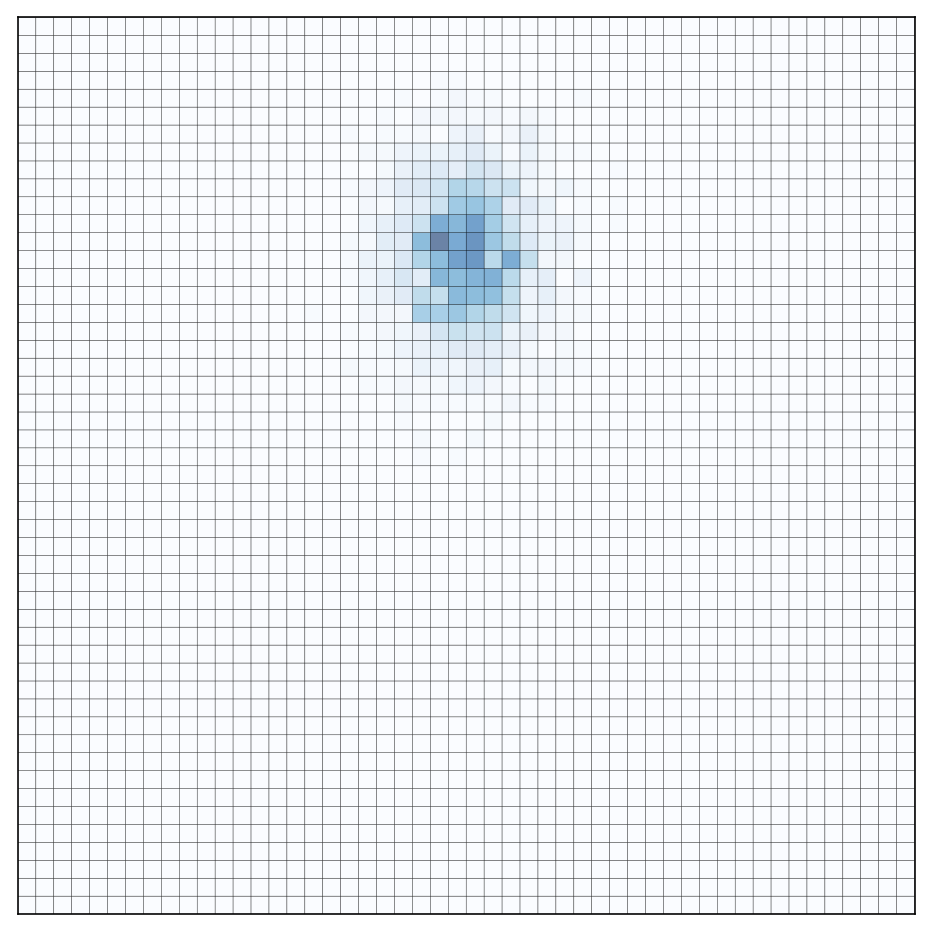

In [5]:
fig = plt.figure(figsize=(fig_width, fig_width))
#a = fig.add_subplot(1, 1, 1)
a = fig.add_axes((0, 0, 1, 1))
N = 2048
width=mp.width
x_sigma = .1
V_X = .7
v_sigma=.2
X_0 = -.0
particles = np.vstack((x_sigma*np.random.randn(N)+X_0,
                       x_sigma*np.random.randn(N)+X_0,
                       np.random.randn(N)*v_sigma+V_X,
                       np.random.randn(N)*v_sigma,
                      1.*np.ones((N))/float(N)))

x = particles[0, :]
u = particles[2, :]
# we weight the readout by the weight of the particles
weights = particles[4,  :]

x_edges = np.linspace(-width/2, width/2, N_quant_X+1)
u_edges = np.linspace(-1.5, 1.5, N_quant_X+1)
v_hist, x_edges_, u_edges_ = np.histogram2d(x, u, (x_edges, u_edges), normed=False, weights=weights)

a.pcolor(u_edges, x_edges, v_hist.T, vmin=0., vmax=v_hist.max(), cmap=plt.cm.Blues, edgecolor='k', alpha=.6)
#_ = a.axis([-mp.width/2, mp.width/2, -mp.width/2, mp.width/2])
plt.setp(a, xticks=[], yticks=[])

for ext in ['.png']: fig.savefig(os.path.join('/tmp/', 'sample_hist_source' + ext))

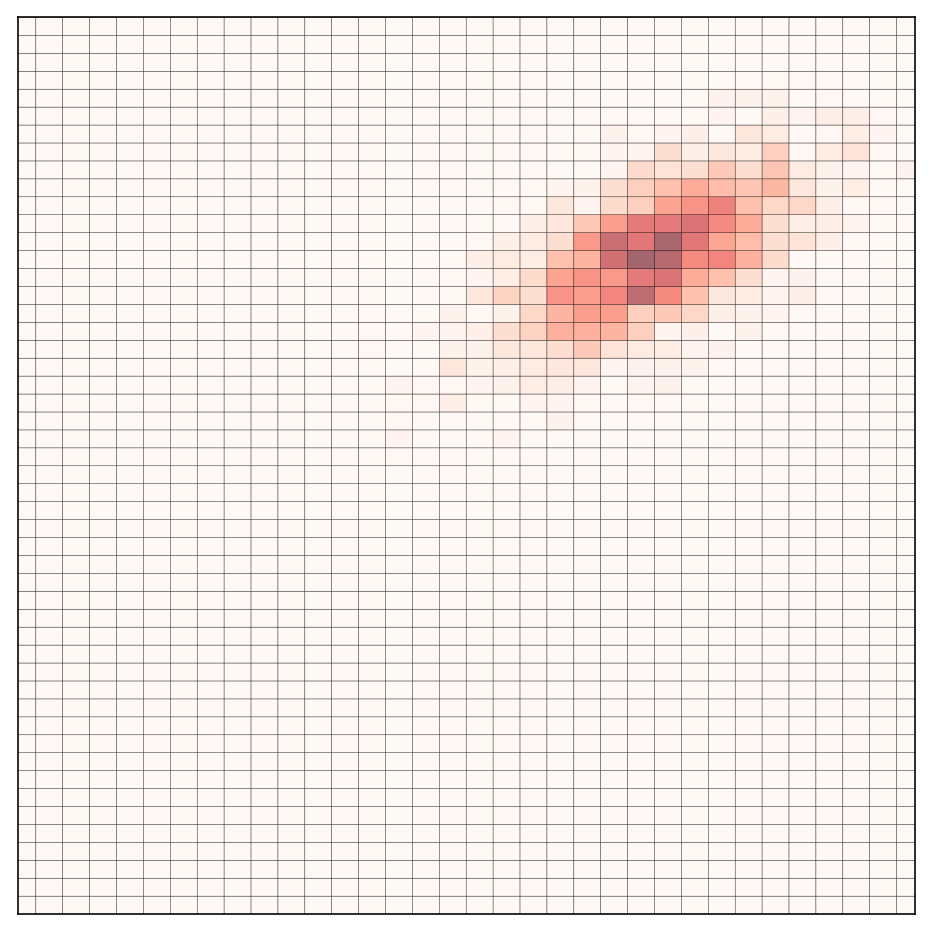

In [6]:
fig = plt.figure(figsize=(fig_width, fig_width))
#a = fig.add_subplot(1, 1, 1)
a = fig.add_axes((0, 0, 1, 1))
    
particles = mp.prediction(particles, N_frame=5, D_V=.1, D_x=.1, width=mp.width, v_prior=0.)

x = particles[0, :]
u = particles[2, :]
# we weight the readout by the weight of the particles
weights = particles[4,  :]

x_edges = np.linspace(-width/2, width/2, N_quant_X+1)
u_edges = np.linspace(-1.5, 1.5, N_quant_X+1)
v_hist, x_edges_, u_edges_ = np.histogram2d(x, u, (x_edges, u_edges), normed=False, weights=weights)

a.pcolor(u_edges, x_edges, v_hist.T, vmin=0., vmax=v_hist.max(), cmap=plt.cm.Reds, edgecolor='k', alpha=.6)
_ = a.axis([-mp.width/2, mp.width/2, -mp.width/2, mp.width/2])
plt.setp(a, xticks=[], yticks=[])

for ext in ['.png']: fig.savefig(os.path.join('/tmp/', 'sample_hist_target' + ext))
    

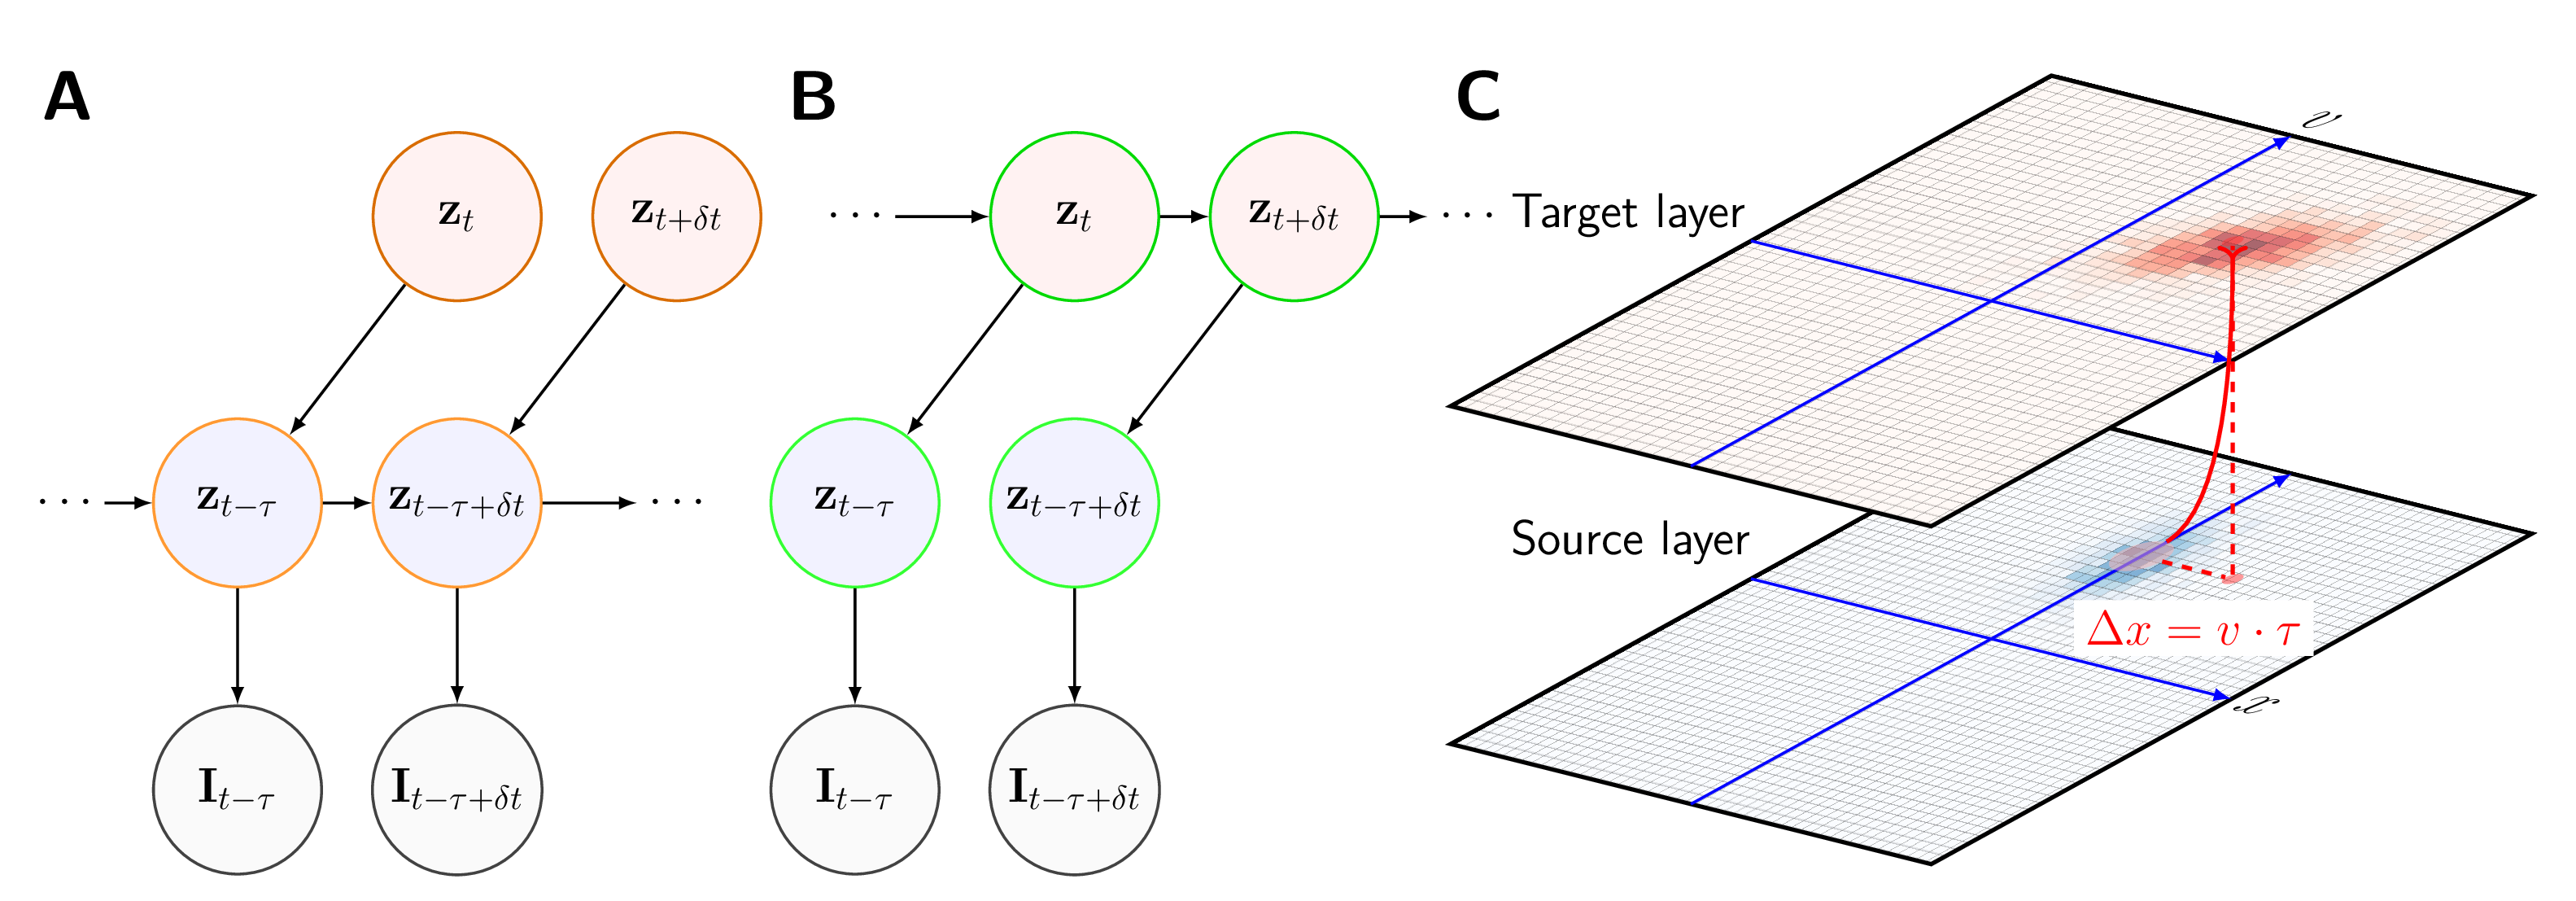

In [ ]:
%%tikz -l arrows.meta -e ../figures/FLE_DiagonalMarkov.pdf

%\pgfmathsetlengthmacro{\Twidth}{13.335}
% \textwidth = 13.335
% \def\Twidth{13.335};% unit 1/72.27in = 0.351459804mm 
\draw[white, fill=white] (-.89\textwidth, -.32\textwidth) rectangle (1.275\textwidth, .42\textwidth) ;

%%%%%%%%%%%%%%%%% PUSH %%%%%%%%%%%%%%%%%
\begin{scope}[yshift=0cm, xshift=-7cm, font=\Large]
\tikzstyle{state}      =[circle, thick, minimum size=1.75cm, draw=orange!80, fill=blue!5]
\tikzstyle{measurement}=[circle, thick, minimum size=1.75cm, draw=black!80, fill=gray!5]
\tikzstyle{present}    =[circle, thick, minimum size=1.75cm, draw=orange!85!black, fill=red!5]
   \matrix[row sep=1.2cm,column sep=0.5cm] {
         & & \node (t)   [present] {$\mathbf{z}_{t}$}; & \node (t+dt) [present] {$\mathbf{z}_{t + \delta t}$}; \\
        \node (A)  {$\cdots$}; &  \node (t-tau)   [state] {$\mathbf{z}_{t-\tau}$};     &
        \node (t-tau+dt) [state] {$\mathbf{z}_{t - \tau+\delta t}$}; & \node (B)  {$\cdots$};   \\
        & \node (I_t-tau) [measurement] {$\mathbf{I}_{t - \tau}$}; &   
        \node (I_t-tau+dt)   [measurement] {$\mathbf{I}_{t - \tau + \delta t}$}; & \\
    };
    \path[-latex, thick]
        (A)   edge (t-tau) 
        (t-tau)   edge (t-tau+dt)
        (t-tau+dt) edge (B)
        (t)   edge (t-tau)
        (t+dt)   edge (t-tau+dt)
        (t-tau)   edge (I_t-tau)
        (t-tau+dt) edge (I_t-tau+dt);
\end{scope}
%%%%%%%%%%%%%%%%% PULL %%%%%%%%%%%%%%%%%
\begin{scope}[yshift=0cm, xshift=0.5cm, font=\Large]
\tikzstyle{state}      =[circle, thick, minimum size=1.75cm, draw=green!80, fill=blue!5]
\tikzstyle{measurement}=[circle, thick, minimum size=1.75cm, draw=black!80, fill=gray!5]
\tikzstyle{present}    =[circle, thick, minimum size=1.75cm, draw=green!85!black, fill=red!5]
   \matrix[row sep=1.2cm,column sep=0.5cm] {
        & \node (A) {$\cdots$}; & \node (t) [present] {$\mathbf{z}_{t}$}; & 
        \node (t+dt) [present] {$\mathbf{z}_{t + \delta t}$}; & \node (B){$\cdots$}; \\
        &  \node (t-tau)   [state] {$\mathbf{z}_{t-\tau}$};     & 
        \node (t-tau+dt)   [state] {$\mathbf{z}_{t - \tau+\delta t}$}; & & \\
        &         \node (I_t-tau) [measurement] {$\mathbf{I}_{t - \tau}$}; &      
        \node (I_t-tau+dt)   [measurement] {$\mathbf{I}_{t - \tau + \delta t}$}; & & \\
    };
    \path[-latex, thick]
        (A)   edge (t) 
        (t)   edge (t+dt)
        (t+dt) edge (B)
        (t)   edge (t-tau)
        (t+dt)   edge (t-tau+dt)
        (t-tau)   edge (I_t-tau)
        (t-tau+dt) edge (I_t-tau+dt) ;
\end{scope}
%%%%%%%%%%%%%%%%% NEURAL %%%%%%%%%%%%%%%%%
\begin{scope}[yshift=-2.5cm, xshift=4cm]        
    \tikzstyle{every pin edge}=[<-,shorten <=1pt]
    \tikzstyle{neuron}=[circle,fill=black!25,inner sep=0pt]
    \tikzstyle{input neuron1}=[neuron,minimum size=12pt, fill=red!30,fill opacity=0.5];
    \tikzstyle{input neuron2}=[neuron,minimum size=12pt, fill=red!30,fill opacity=0.5];
    \tikzstyle{output neuron1}=[neuron,minimum size=4pt, fill=red!80,fill opacity=0.5];

    \begin{scope}[every node/.append style={
            yslant=-0.25,xslant=1.25},yslant=-0.25,xslant=1.25
                  ]
        \node[anchor=south west] (source) at (-0.1, -0.1) 
        {\includegraphics[width=5cm]{/tmp/sample_hist_source.png}} ;
        \draw[black,very thick] (0,0) rectangle (5,5);
        \draw[-latex,thick,blue](0, 2.5) to (5, 2.5);
        \draw[-latex,thick,blue](2.5, 0) to (2.5, 5);
        \draw[font=\bf\sffamily\Large] (5,2.5) node[right]{$x$};
%        \draw[font=\bf\sffamily\Large] (2.5,5) node[above]{$v$};

    \node[input neuron1] (in) at (2.5, 3.75) {};
    \node[output neuron1] (proj) at (3.45, 3.75) {};  
    \end{scope} 

    % area V1 input
    \begin{scope}[yshift=100,every node/.append style={
            yslant=-0.25,xslant=1.25},yslant=-0.25,xslant=1.25
            ] 
        % opacity to prevent graphical interference
        \fill[white,fill opacity=.9] (0,0) rectangle (5,5);
        \node[anchor=south west] (target) at (-0.1, -0.1) 
         {\includegraphics[width=5cm]{/tmp/sample_hist_target.png}} ;
        \draw[black,very thick] (0,0) rectangle (5,5);%marking borders
        \draw[-latex,thick,blue](0,2.5) to (5,2.5);
        \draw[-latex,thick,blue](2.5,0) to (2.5,5);
        %\draw[font=\bf\sffamily\Large] (5,2.5) node[right]{$x$};
        \draw[font=\bf\sffamily\Large] (2.5,5) node[above]{$v$};

        \node[output neuron1] (out) at (3.45, 3.75) {};
    \end{scope}

    \draw[font=\sffamily\Large] (.5cm, 2.1cm) node[right]{Source layer};
    \draw[font=\sffamily\Large] (.5cm, 5.5cm) node[right]{Target layer};

    
    % The diagram elements are now connected through arrows:
    \draw[very thick,red,dashed, font=\Large]    (in)  --  node[below=3mm,fill=white] {$\Delta x = v \cdot\tau$} (proj);
    \draw[very thick,red,dashed]    (proj) to (out)  ;
    \draw[-latex,very thick,red,.-<]  (in) .. controls +(30:1cm) and +(down:1.2cm)  ..  (out) ;
  
\end{scope}
\begin{scope}[font=\bf\sffamily\huge]
\draw [anchor=east,fill=white] (-.825\textwidth, .35\textwidth) node {A};
\draw [anchor=east,fill=white] (-.185\textwidth, .35\textwidth) node {B};
\draw [anchor=east,fill=white] (.385\textwidth, .35\textwidth) node {C};
\end{scope}



In [ ]:
!convert  -density 300  ../figures/FLE_DiagonalMarkov.pdf  ../figures/FLE_DiagonalMarkov.jpg
!convert  -density 600   -units pixelsperinch -resize 5400x5400 -flatten  -compress lzw  -depth 8 ../figures/FLE_DiagonalMarkov.pdf  ../figures/FLE_DiagonalMarkov.tiff

from IPython.display import Image
Image('../figures/FLE_DiagonalMarkov.jpg')

In [ ]:
!echo "width=" ; convert ../figures/FLE_DiagonalMarkov.tiff -format "%[fx:w]" info:
!echo ", \nheight=" ; convert ../figures/FLE_DiagonalMarkov.tiff -format "%[fx:h]" info:
!echo ", \nunit=" ; convert ../figures/FLE_DiagonalMarkov.tiff -format "%U" info:

## version with just the pull mode

In [ ]:
%%tikz -l arrows.meta -e ../figures/FLE_DiagonalMarkov_pull.pdf

%%%%%%%%%%%%%%%%% PUSH %%%%%%%%%%%%%%%%%
\begin{scope}[font=\Large]
\tikzstyle{state}      =[circle, thick, minimum size=1.75cm, draw=orange!80, fill=blue!5]
\tikzstyle{measurement}=[circle, thick, minimum size=1.75cm, draw=black!80, fill=gray!5]
\tikzstyle{present}    =[circle, thick, minimum size=1.75cm, draw=orange!85!black, fill=red!5]
   \matrix[row sep=1.2cm,column sep=0.5cm] {
         & & \node (t)   [present] {$\mathbf{z}_{t}$}; & \node (t+dt) [present] {$\mathbf{z}_{t + \delta t}$}; \\
        \node (A)  {$\cdots$}; &  \node (t-tau)   [state] {$\mathbf{z}_{t-\tau}$};     &
        \node (t-tau+dt) [state] {$\mathbf{z}_{t - \tau+\delta t}$}; & \node (B)  {$\cdots$};   \\
        & \node (I_t-tau) [measurement] {$\mathbf{I}_{t - \tau}$}; &   
        \node (I_t-tau+dt)   [measurement] {$\mathbf{I}_{t - \tau + \delta t}$}; & \\
    };
    \path[-latex, thick]
        (A)   edge (t-tau) 
        (t-tau)   edge (t-tau+dt)
        (t-tau+dt) edge (B)
        (t)   edge (t-tau)
        (t+dt)   edge (t-tau+dt)
        (t-tau)   edge (I_t-tau)
        (t-tau+dt) edge (I_t-tau+dt);
\end{scope}



In [ ]:
!convert  -density 300  ../figures/FLE_DiagonalMarkov_pull.pdf ../figures/FLE_DiagonalMarkov_pull.jpg
Image('../figures/FLE_DiagonalMarkov_pull.jpg')

In [ ]:
%%tikz -l arrows.meta -e ../figures/FLE_DiagonalMarkov_simple.pdf

\draw[white, fill=white] (0, 0) rectangle (\textwidth, .618\textwidth) ;

\node[anchor=north west] (navier) at (.0\textwidth, .6\textwidth)  {\includegraphics[width=.5\textwidth]{../figures/FLE_DiagonalMarkov_pull.pdf}} ;
\node[anchor=north west] (navier) at (.45\textwidth, .5\textwidth)  {\includegraphics[width=.5\textwidth]{../figures/navier.pdf}} ;


In [ ]:
!convert  -density 300  ../figures/FLE_DiagonalMarkov_simple.pdf  ../figures/FLE_DiagonalMarkov_simple.jpg
!convert  -density 600   -units pixelsperinch -resize 5400x5400 -flatten  -compress lzw  -depth 8 ../figures/FLE_DiagonalMarkov_simple.pdf  ../figures/FLE_DiagonalMarkov_simple.tiff
!convert  -density 600   -units pixelsperinch -resize 5400x5400 -flatten  -compress lzw  -depth 8 ../figures/FLE_DiagonalMarkov_simple.pdf  ../figures/FLE_DiagonalMarkov_simple.png
from IPython.display import Image
Image('../figures/FLE_DiagonalMarkov_simple.jpg')

In [ ]:
!echo "width=" ; convert ../figures/FLE_DiagonalMarkov_simple.tiff -format "%[fx:w]" info:
!echo ", \nheight=" ; convert ../figures/FLE_DiagonalMarkov_simple.tiff -format "%[fx:h]" info:
!echo ", \nunit=" ; convert ../figures/FLE_DiagonalMarkov_simple.tiff -format "%U" info:

In [ ]:
%%tikz -l arrows.meta -e ../figures/FLE_DiagonalMarkov_neural.pdf

%%%%%%%%%%%%%%%%% NEURAL %%%%%%%%%%%%%%%%%
\begin{scope}
    \tikzstyle{every pin edge}=[<-,shorten <=1pt]
    \tikzstyle{neuron}=[circle,fill=black!25,inner sep=0pt]
    \tikzstyle{input neuron1}=[neuron,minimum size=12pt, fill=red!30,fill opacity=0.5];
    \tikzstyle{input neuron2}=[neuron,minimum size=12pt, fill=red!30,fill opacity=0.5];
    \tikzstyle{output neuron1}=[neuron,minimum size=4pt, fill=red!80,fill opacity=0.5];

    \begin{scope}[every node/.append style={
            yslant=-0.25,xslant=1.25},yslant=-0.25,xslant=1.25
                  ]
        \node[anchor=south west] (source) at (-0.1, -0.1) 
        {\includegraphics[width=5cm]{/tmp/sample_hist_source.png}} ;
        \draw[black,very thick] (0,0) rectangle (5,5);
        \draw[-latex,thick,blue](0, 2.5) to (5, 2.5);
        \draw[-latex,thick,blue](2.5, 0) to (2.5, 5);
        \draw[font=\bf\sffamily\Large] (5,2.5) node[right]{$x$};
%        \draw[font=\bf\sffamily\Large] (2.5,5) node[above]{$v$};

    \node[input neuron1] (in) at (2.5, 3.75) {};
    \node[output neuron1] (proj) at (3.45, 3.75) {};  
    \end{scope} 

    % area V1 input
    \begin{scope}[yshift=100,every node/.append style={
            yslant=-0.25,xslant=1.25},yslant=-0.25,xslant=1.25
            ] 
        % opacity to prevent graphical interference
        \fill[white,fill opacity=.9] (0,0) rectangle (5,5);
        \node[anchor=south west] (target) at (-0.1, -0.1) 
         {\includegraphics[width=5cm]{/tmp/sample_hist_target.png}} ;
        \draw[black,very thick] (0,0) rectangle (5,5);%marking borders
        \draw[-latex,thick,blue](0,2.5) to (5,2.5);
        \draw[-latex,thick,blue](2.5,0) to (2.5,5);
        %\draw[font=\bf\sffamily\Large] (5,2.5) node[right]{$x$};
        \draw[font=\bf\sffamily\Large] (2.5,5) node[above]{$v$};

        \node[output neuron1] (out) at (3.45, 3.75) {};
    \end{scope}

    \draw[font=\sffamily\Large] (.5cm, 2.1cm) node[right]{Source layer};
    \draw[font=\sffamily\Large] (.5cm, 5.5cm) node[right]{Target layer};

    
    % The diagram elements are now connected through arrows:
    \draw[very thick,red,dashed, font=\Large]    (in)  --  node[below=3mm,fill=white] {$\Delta x = v \cdot\tau$} (proj);
    \draw[very thick,red,dashed]    (proj) to (out)  ;
    \draw[-latex,very thick,red,.-<]  (in) .. controls +(30:1cm) and +(down:1.2cm)  ..  (out) ;
  
\end{scope}


In [ ]:
!convert  -density 300  ../figures/FLE_DiagonalMarkov_neural.pdf ../figures/FLE_DiagonalMarkov_neural.jpg
Image('../figures/FLE_DiagonalMarkov_neural.jpg')

In [ ]:
%%tikz -l arrows.meta -e ../figures/FLE_DiagonalMarkov_simple2.pdf

\draw[white, fill=white] (0, 0) rectangle (\textwidth, .618\textwidth) ;

\node[anchor=north west] (navier) at (.0\textwidth, .6\textwidth)  {\includegraphics[width=.5\textwidth]{../figures/FLE_DiagonalMarkov_pull.pdf}} ;

\node[anchor=north west] (navier) at (.5\textwidth, .55\textwidth)  {\includegraphics[width=.5\textwidth]{../figures/FLE_DiagonalMarkov_neural.pdf}} ;


In [ ]:
!convert  -density 300  ../figures/FLE_DiagonalMarkov_simple2.pdf  ../figures/FLE_DiagonalMarkov_simple2.jpg
!convert  -density 600   -units pixelsperinch -resize 5400x5400 -flatten  -compress lzw  -depth 8 ../figures/FLE_DiagonalMarkov_simple2.pdf  ../figures/FLE_DiagonalMarkov_simple2.tiff
!convert  -density 600   -units pixelsperinch -resize 5400x5400 -flatten  -compress lzw  -depth 8 ../figures/FLE_DiagonalMarkov_simple2.pdf  ../figures/FLE_DiagonalMarkov_simple2.png
from IPython.display import Image
Image('../figures/FLE_DiagonalMarkov_simple2.jpg')

In [ ]:
!echo "width=" ; convert ../figures/FLE_DiagonalMarkov_simple2.tiff -format "%[fx:w]" info:
!echo ", \nheight=" ; convert ../figures/FLE_DiagonalMarkov_simple2.tiff -format "%[fx:h]" info:
!echo ", \nunit=" ; convert ../figures/FLE_DiagonalMarkov_simple2.tiff -format "%U" info:

## version control

In [ ]:
#! git rm -f ../figures/DiagonalMarkov.*
#! git add  ../figures/FLE_DiagonalMarkov*
!git status

In [ ]:
!git commit -m' DiagonalMarkov figure : resize ' ../notebooks/figure_2_DiagonalMarkov.ipynb ../khoei17fle.tex ../figures/FLE_Diagonal* 
